In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("A_Z Handwritten Data.csv",header=0)

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
X=df.iloc[:,1:].values

In [6]:
Y=df.iloc[:,0].values


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

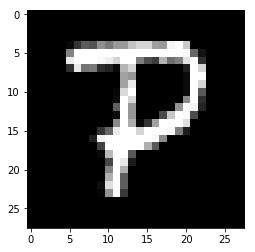

In [81]:
plt.imshow(x_train[0].reshape(28,28),cmap=plt.cm.gray)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [9]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
y_pred=dtc.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9402783371369758

In [13]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)

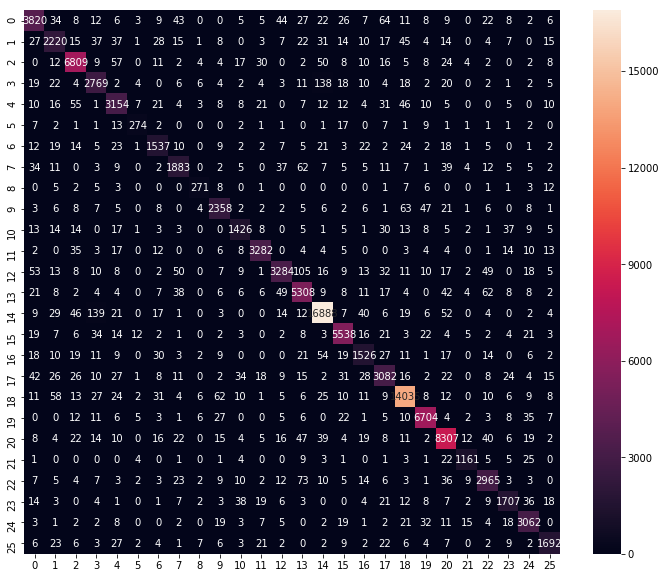

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(c,annot=True,fmt='d')

#### Precision TP/TP+FP
#### Recall TP/TP+FN
#### F1score 

In [27]:
from sklearn.metrics import precision_recall_fscore_support

In [29]:
precision_recall_fscore_support(y_test,y_pred)

(array([0.91849002, 0.87127159, 0.95484504, 0.88523018, 0.89985735,
        0.85893417, 0.87478657, 0.88362271, 0.86305732, 0.91466253,
        0.89069332, 0.95434719, 0.93561254, 0.92104807, 0.97359622,
        0.95532172, 0.86655309, 0.89514958, 0.9741116 , 0.97018813,
        0.95263761, 0.9477551 , 0.91682127, 0.90942994, 0.92956891,
        0.92106696]),
 array([0.90930731, 0.85979861, 0.9598252 , 0.90019506, 0.9142029 ,
        0.7942029 , 0.87979393, 0.87540679, 0.83128834, 0.91679627,
        0.87970389, 0.95768894, 0.87995713, 0.94213703, 0.97511404,
        0.96279555, 0.84355998, 0.88997979, 0.97444977, 0.9739939 ,
        0.96012483, 0.93103448, 0.92166615, 0.88675325, 0.9453535 ,
        0.90578158]),
 array([0.9138756 , 0.86549708, 0.95732865, 0.8926499 , 0.9069734 ,
        0.8253012 , 0.87728311, 0.87949556, 0.846875  , 0.91572816,
        0.88516449, 0.95601515, 0.90693179, 0.93147319, 0.97435454,
        0.95904407, 0.85490196, 0.8925572 , 0.97428066, 0.97208729,
    

In [32]:
from sklearn.metrics import roc_curve,auc

In [ ]:
fpr={}
tpr={}
for i in range(26):
    fpr[i],tpr[i]

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [66]:
y=label_binarize(Y,classes=list(range(26)))
y.shape[1]

26

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [57]:
classifier=OneVsRestClassifier(dtc)

In [58]:
classifier.fit(x_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          n_jobs=None)

In [60]:
y_pred=classifier.predict(x_test)

In [62]:
y_score=classifier.predict_proba(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.901150042511299

In [73]:
fpr={}
tpr={}
roc_auc={}
for i in range(y.shape[1]):
    
    fpr[i],tpr[i],_=roc_curve(y_test[:,i],y_pred[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    

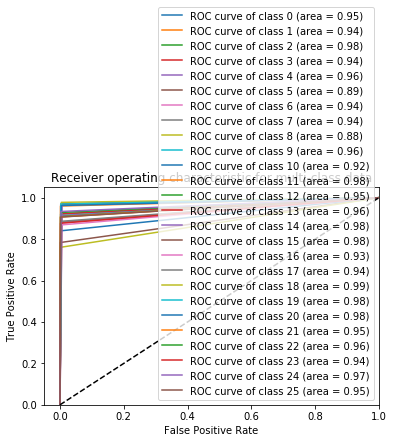

In [80]:
for i in range(y.shape[1]):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
